In [ ]:
#importing thre required libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [ ]:
# Load dataset which is Fashion MNIST
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

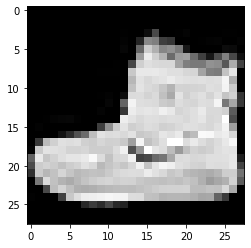

In [ ]:
# Visualize a sample image
plt.imshow(X_train[0], cmap='gray')

In [ ]:
# to check out the shape of the training data
X_train.shape

(60000, 28, 28)

In [ ]:
# to  check out the shape of the testing data
X_test.shape

(10000, 28, 28)

In [ ]:
#to check out the shape of training labels
y_train.shape

(60000,)

In [ ]:
#to check out the shape of testing labels
y_test.shape

(10000,)

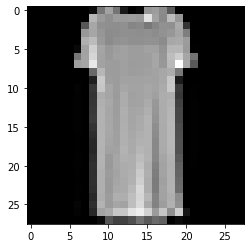

In [ ]:
# to check some random image in the training dataset
i = random.randint(1, 60000)
plt.imshow(X_train[i],cmap='gray')

In [ ]:
#to check the label of the above random images
label = y_train[i]
label

3

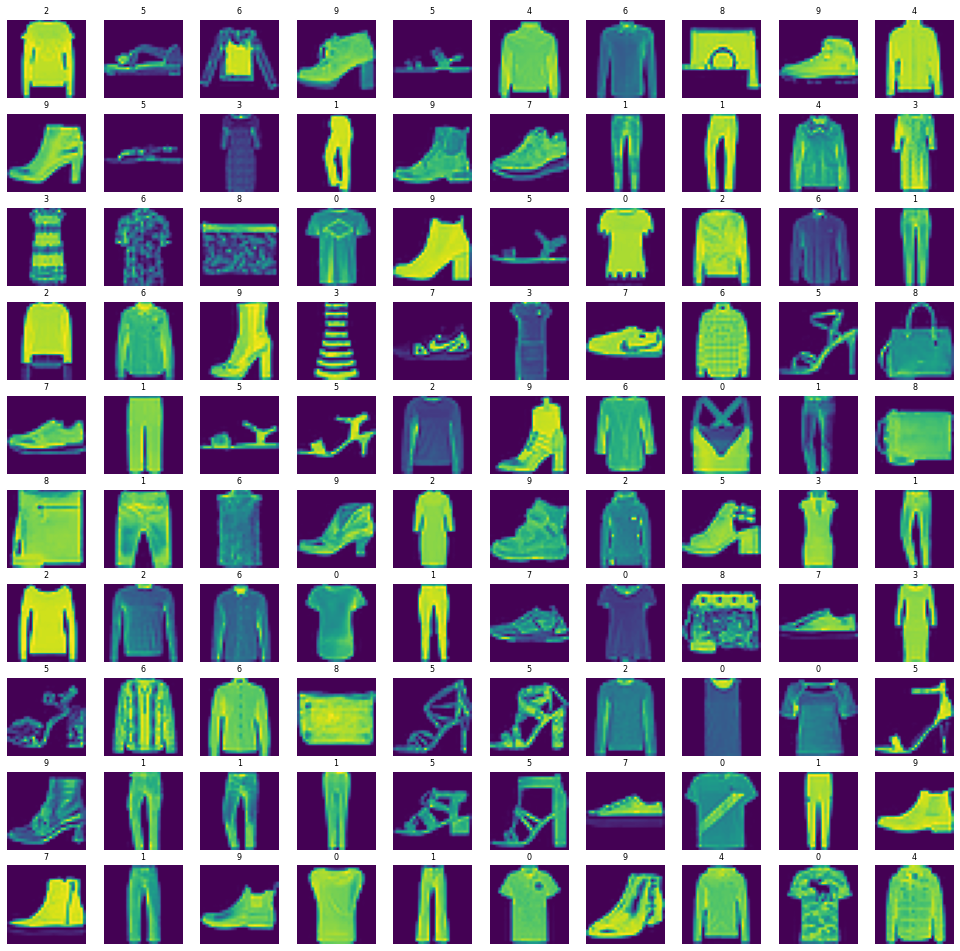

In [ ]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 10 x 10 matrix into 100 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index],fontsize = 8)
    axes[i].axis('off')


In [ ]:
# normalizing the data
X_train = X_train/255.
X_test = X_test/255.

In [ ]:
# adding some noise to the training data
noise_factor = 0.3

noisy_dataset = []
#adding noise to every single image
for img in X_train:
    noisy_image = img + noise_factor *np.random.randn(*img.shape)
    noisy_image = np.clip(noisy_image, 0 ,1)
    noisy_dataset.append(noisy_image)


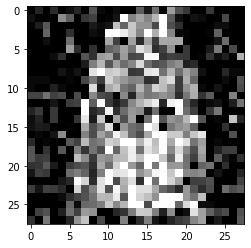

In [ ]:
#to check the image after adding the noise
plt.imshow(noisy_dataset[22], cmap = 'gray')

noisy_dataset = np.array(noisy_dataset)

In [ ]:
#adding noise to test dataset
noise_factor = 0.1

noisy_test_dataset = []
#adding noise to every single image
for img in X_test:
    noisy_image = img + noise_factor *np.random.randn(*img.shape)
    noisy_image = np.clip(noisy_image, 0 ,1)
    noisy_test_dataset.append(noisy_image)


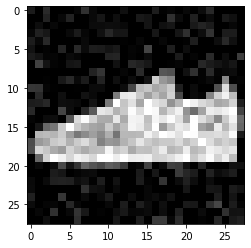

In [ ]:
# add noise to testing dataset
#to check the image after adding the noise
plt.imshow(noisy_test_dataset[22], cmap = 'gray')

noisy_test_dataset = np.array(noisy_test_dataset)

In [ ]:
#building the autoencoder, used to perfrom representation learning or data encoding 
autoencoder = tf.keras.models.Sequential()

#Encoder
autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, strides = 2, padding = 'same', input_shape = (28,28,1)))
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = 3, strides = 2, padding = 'same'))

autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = 3, strides = 1, padding = 'same'))

#decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 16, kernel_size = 3, strides = 2, padding = 'same' ))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 1, kernel_size = 3, strides = 2, activation = 'sigmoid', padding = 'same'))


In [ ]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()
#compiling the model

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#training the model
autoencoder.fit(noisy_dataset.reshape(-1, 28, 28, 1),
               X_train.reshape(-1, 28, 28, 1),
               epochs = 10,
               batch_size = 200,
               validation_data = (noisy_test_dataset.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1)))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 36s 601us/sample - loss: 0.3949 - val_loss: 0.3180
Epoch 2/10
60000/60000 [==============================] - 32s 538us/sample - loss: 0.3177 - val_loss: 0.3069
Epoch 3/10
60000/60000 [==============================] - 32s 535us/sample - loss: 0.3110 - val_loss: 0.3006
Epoch 4/10
60000/60000 [==============================] - 32s 536us/sample - loss: 0.3076 - val_loss: 0.2959
Epoch 5/10
60000/60000 [==============================] - 32s 539us/sample - loss: 0.3056 - val_loss: 0.2934
Epoch 6/10
60000/60000 [==============================] - 33s 548us/sample - loss: 0.3043 - val_loss: 0.2933
Epoch 7/10
60000/60000 [==============================] - 33s 542us/sample - loss: 0.3033 - val_loss: 0.2917
Epoch 8/10
60000/60000 [==============================] - 32s 540us/sample - loss: 0.3025 - val_loss: 0.2906
Epoch 9/10
60000/60000 [==============================] - 37s 618us/sample - l

In [ ]:
#evaluating the performance of model
evaluation = autoencoder.evaluate( noisy_test_dataset.reshape(-1, 28, 28, 1), X_test.reshape(-1,28, 28, 1))
print('Test Loss : {:3f}'.format(evaluation))

10000/10000 [==============================] - 3s 341us/sample - loss: 0.2887
Test Loss : 0.288750


In [ ]:
predict = autoencoder.predict(noisy_test_dataset[:10].reshape(-1, 28 ,28, 1))
#to plot the prediction of first 10 images by the model

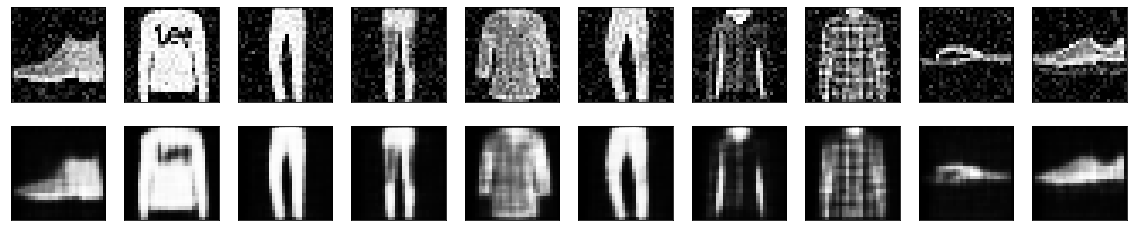

In [ ]:
#plotting of the prediction of model
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noisy_test_dataset[:10], predict], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

Class according to the labels
- 0 = T-shirt/top
- 1 = Trouser
- 2 = Pullover
- 3 = Dress
- 4 = Coat
- 5 = Sandal
- 6 = Shirt
- 7 = Sneaker
- 8 = Bag
- 9 = Ankle boot